In [6]:
from chenkov_mccolgan import *
%matplotlib inline

In [2]:
model = create_model()
model.load_weights('model_convnet_6')

In [3]:
calcium_train, calcium_train_padded, spikes_train_padded,\
calcium_test, calcium_test_padded, ids_oneshot, ids_oneshot_test,\
ids_stacked, ids_test_stacked, sample_weight = load_data()

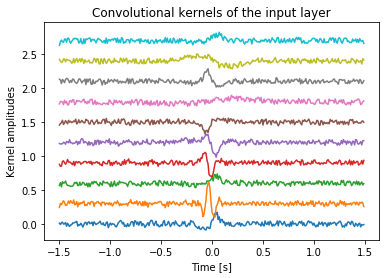

In [7]:
plot_kernels(model)